In [255]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
import os,math,itertools,warnings,datetime,time

import torch
import pandas as pd

In [315]:
class BRAIN():
    
    def __init__(self,Ni,No,Nh):
        # Set network size
        self.Ni = Ni
        self.No = No
        self.Nh = Nh
        self.N = self.Ni + self.No + self.Nh
        # Non-Linearity
        self.sigma = lambda x: 1/(1+np.exp(-x))
        # Selection matrices
        self.R0 = np.concatenate((
            np.zeros([self.Ni,self.N]),
            np.concatenate((np.zeros([self.No+self.Nh,self.Ni]),np.eye(self.No+self.Nh)),axis=1)
        ),axis=0)
        self.R1 = np.concatenate((
            np.concatenate((np.eye(self.Ni),np.zeros([self.Ni,self.No+self.Nh])),axis=1),
            np.zeros((self.No+self.Nh,self.N))
        ),axis=0)
        # Network matrix and bias vector, selected randomly
        self.W = rnd.randn(self.N,self.N)
        self.W /= self.W.sum()
        self.b = rnd.randn(self.N,1)
        self.b /= self.b.sum()
        return
        
    def plot_nonlinearity(self,range_minmax=[-10,10]):
        plt.plot(self.sigma(np.arange(range_minmax[0],range_minmax[1],0.01)))
        plt.show()
        return

    def settle_nw(self,s0,iter_eps=0.0001,iternum_max=1000):
        # Initialize logs
        out_log = []
        update_log = []
        # Set trackers
        ctr = 0
        update_magn = 100000
        # Iterate until convergence 
        st = s0
        while update_magn>iter_eps and ctr<=iternum_max:
            # Calculate next state vector
            stn = np.dot(self.R0,self.sigma(np.dot(self.W,st)) + self.b) + np.dot(self.R1,st)
            update_magn = np.linalg.norm(stn-st,ord=2)
            st = stn
            # Log progress
            out_log.append(st[self.Ni:(self.Ni+self.No)].reshape(-1).tolist())
            update_log.append(update_magn)
            # Track number of iterations
            ctr += 1
        convergence_reached = (update_magn<iter_eps)
        num_iterations_used = ctr
        # Return results
        return st,out_log,update_log,num_iterations_used,convergence_reached

In [397]:
G = BRAIN(Ni=1,No=1,Nh=20)

In [398]:
X,Y = [],[]

for x in np.arange(-100,100,1):
    Xt,Yt = [],[]
    for k in range(5):
        s0 = rnd.randn(G.N,1)
        s0[:G.Ni] = np.array([x]).reshape(-1,1)
        _,outputs,_,_,_ = G.settle_nw(s0)
        y = outputs[-1]
        Xt.append(x)
        Yt.append(y)
    X.append(Xt)
    Y.append(Yt)

X = [np.mean(X[k]) for k in range(len(X))]
Y = [np.mean(Y[k]) for k in range(len(Y))]

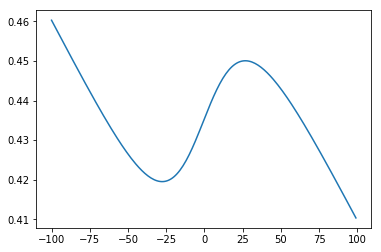

In [399]:
plt.plot(X,Y)